<a href="https://colab.research.google.com/github/GenoKiller777/PythonMyFirstNeuronalNetwork/blob/main/PerceptronRegresivo_DarwinPerez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Ecommerce.csv to Ecommerce.csv
User uploaded file "Ecommerce.csv" with length 87360 bytes


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Ecommerce.csv')

In [4]:
df = df.loc[:, 'Avg. Session Length':'Yearly Amount Spent']

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [6]:
# Matriz de Features
X = df.drop('Yearly Amount Spent', axis=1).values

# Variable objetivo
y = df['Yearly Amount Spent'].values

In [7]:
# Define una función que calcule el producto punto entre dos vectores:
def dot_product(x, w):
    return np.dot(x,w)

In [8]:
# Define la función de activación.
def activation(x):
    # en este caso será la función lineal
    return x

In [9]:
# Define la función de entrenamiento del perceptrón:
def perceptron_train(X, y, num_epochs, learning_rate):

  # inicalizar pesos de forma aleatoria
  weights = np.random.rand( X.shape[1] )

  # acá dejaremos el error que hubo en cada iteración
  errors = []

  # iterar las epocas
  for epochs in range(num_epochs):

    epoch_error = 0

    # itera sobre todos los elementos del set de entrenamiento
    for i in range(X.shape[0]):

      # calcular la salida del perceptron
      output = activation( dot_product(X[i], weights) )

      #  contabilizar el error
      if output != y[i]:
        # definimos la siguiente metrica de error
        error = y[i] - output
        # actualizamos los pesos si la salida es incorrecta
        weights = weights + learning_rate * error * X[i]
        epoch_error = epoch_error + abs(error)


    errors.append(epoch_error)

  return weights, errors

In [62]:
# Ahora puedes utilizar la función perceptron_train para entrenar el perceptrón con tus datos de entrenamiento:
# En este ejemplo, utilizamos los datos de entrenamiento X y y para entrenar el perceptrón durante 30 épocas,
# con una tasa de aprendizaje de 0.1.
# La función devuelve los pesos entrenados y los errores computados en cada epoch
weights, errors = perceptron_train(X, y, num_epochs = 120, learning_rate=0.0001)

## Determine los pesos de cada Variable.

In [63]:
# estos son los pesos calculados
weights

array([ 11.5215657 ,  34.76182537, -13.56110271,  60.00639394])

## Haga predicciones con los siguientes datos.

In [64]:
# Para hacer predicciones con el perceptrón entrenado, utilizamos la siguiente función:
def perceptron_predict(x, weights):
    return activation(dot_product(x, weights))

In [65]:
# Puedes utilizarla para predecir la salida de un ejemplo dado:
x = np.array([34.497268,12.655651, 39.577668, 4.082621])
prediction = perceptron_predict(x, weights)

print(f'El valor que se obtiene es: {prediction}.')

El valor que se obtiene es: 545.6626128605659.


## Calcule el MAE.

In [66]:
y_pred = [perceptron_predict(x, weights) for x in X]
MAE = np.mean(np.abs(y - y_pred))

print(f'EL Error absoluto medio es de: {MAE}.')

EL Error absoluto medio es de: 19.73791568712183.


## Calcule el coeficiente R2.

In [67]:
def r2(y_true, y_pred):
  y_mean = sum(y_true)/len(y_true)
  return sum((y_pred - y_mean)**2) / sum((y_true - y_mean)**2)

R2 = r2(y,y_pred)

In [68]:
print(f'EL Coeficiente R^2 es de: {round(R2*100,3)} %.')

EL Coeficiente R^2 es de: 85.837 %.


## Grafique Error versus Epoch.

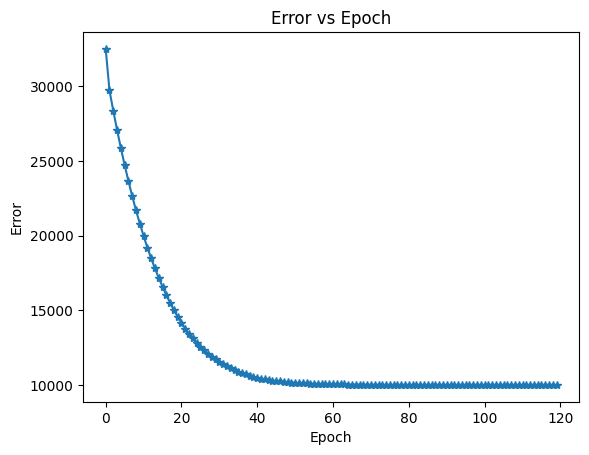

In [69]:
plt.plot(errors,marker ='*')

plt.title("Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()